# 샘플 데이터와 Out-of-Distribution 모델

In [1]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data
### 1.1 Sample Data

In [17]:
from sklearn.datasets import make_moons

data, label = make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=2021)

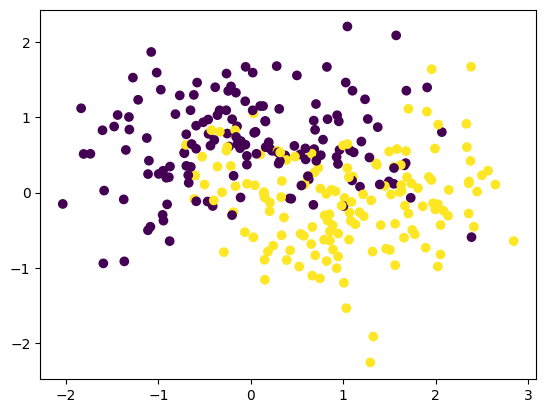

In [18]:
plt.scatter(data[:, 0], data[:, 1], c=label)

### 1.2 Resample Data

In [19]:
from imblearn.datasets import make_imbalance
from collections import Counter

def ratio_func(y, multiplier, minority_class):
  target_stats = Counter(y)
  return {minority_class: int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
    data,
    label,
    sampling_strategy=ratio_func,
    **{"multiplier": 0.1, "minority_class": 1,}
)

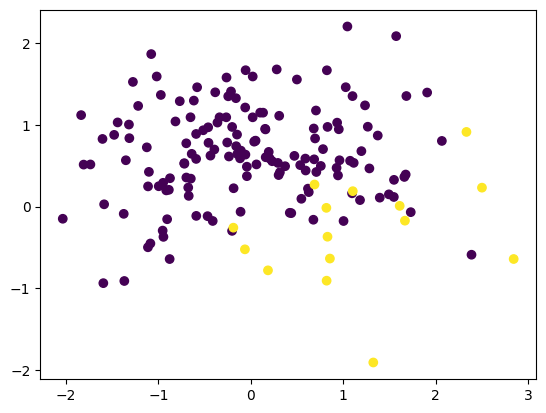

In [20]:
plt.scatter(data[:, 0], data[:, 1], c=label)

## 1.3 Split Data

In [21]:
normal_data, abnormal_data = data[label==0], data[label==1]
normal_label, abnormal_label = label[label==0], label[label==1]

In [22]:
normal_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
abnormal_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
from sklearn.model_selection import train_test_split

train_data, test_normal_data, train_label, test_normal_label = train_test_split(
    normal_data, normal_label, train_size=0.7, random_state=2021
)

In [26]:
test_data = np.concatenate([test_normal_data, abnormal_data])
test_label = np.concatenate([test_normal_label, abnormal_label])

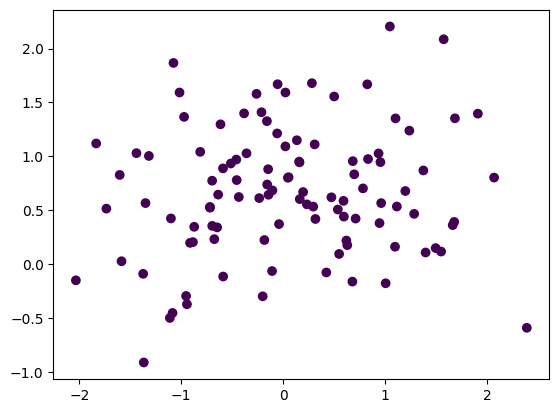

In [27]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

In [28]:
test_label.mean()

0.25

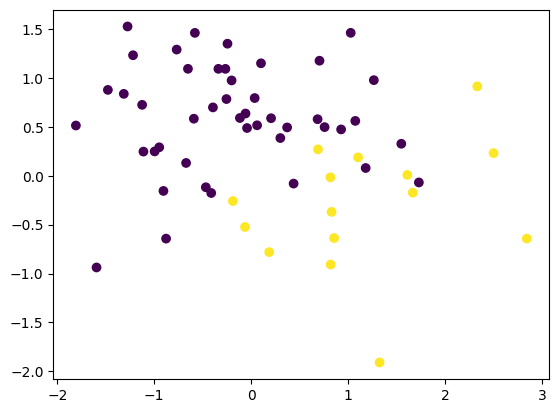

In [29]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

### 1.4 시각화 데이터

In [30]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## 2. Isolation Forest

In [31]:
from sklearn.ensemble import IsolationForest

isol_forest = IsolationForest()

### 2.1 학습 & 예측

In [32]:
isol_forest.fit(train_data, train_label)

IsolationForest()

In [33]:
isol_test_pred = isol_forest.predict(test_data)

In [34]:
isol_test_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1])

In [35]:
isol_forest.decision_function(test_data)

array([ 8.73165224e-02,  3.43317782e-02,  1.21490344e-03,  5.06190489e-02,
        4.61377192e-03,  7.07870856e-02,  8.63086750e-02,  1.07718844e-01,
        9.11377326e-02,  1.14522668e-01,  8.95845858e-02,  2.78121554e-02,
        1.01746976e-01,  4.39477285e-03,  1.05073029e-01, -9.72784831e-02,
        1.02797035e-01, -6.15769020e-02,  5.28115250e-02,  5.42655042e-02,
        2.54417262e-02,  4.00114641e-02,  1.79632034e-02, -1.91352068e-01,
        3.64660671e-02,  8.41428745e-03, -7.17524010e-02,  5.96225891e-02,
        6.11851693e-02,  8.46497015e-02,  1.00245004e-01,  5.01326626e-04,
        5.98796287e-02,  7.12882189e-02, -1.35850835e-03,  7.84952015e-02,
        1.55556914e-02, -2.77880113e-02,  3.01231085e-02,  6.95514760e-02,
        1.05129861e-01,  8.24962498e-02,  3.02403348e-02,  8.78852641e-02,
        2.30042150e-03,  4.73853394e-02, -6.99040965e-02, -2.42795313e-01,
       -3.77680672e-02, -1.72163361e-01, -2.37876900e-04, -1.23015167e-01,
       -4.96523377e-02, -

### 2.2 평가
정확도

In [36]:
from sklearn.metrics import accuracy_score

isol_test_acc = accuracy_score(test_label, isol_test_pred == -1)

In [38]:
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")

Isolation Forest Test Accuracy is 0.8667


F-1 Score

In [39]:
from sklearn.metrics import f1_score

isol_test_f1 = f1_score(test_label, isol_test_pred == -1)

In [40]:
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")

Isolation Forest Test F1-Score is 0.7647


### 2.3 시각화

In [41]:
isol_Z = isol_forest.predict(np.c_[xx.ravel(), yy.ravel()])
isol_Z = isol_Z.reshape(xx.shape)

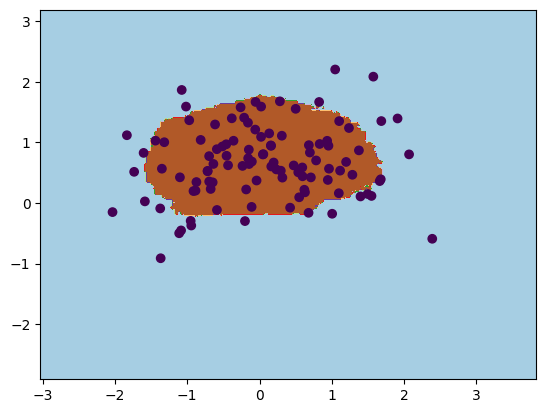

In [43]:
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

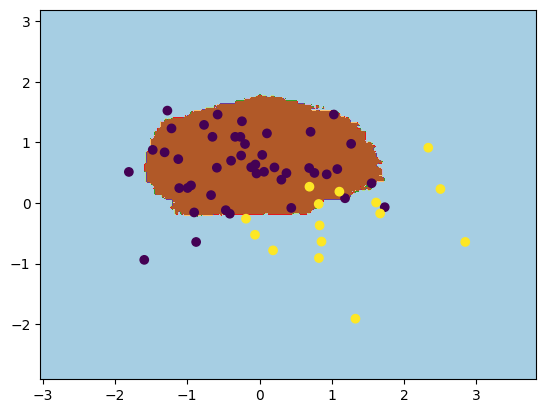

In [45]:
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

## 3. OCCSVM
### 3.1 학습 & 예측

In [46]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM()

In [47]:
ocsvm.fit(train_data, train_label)

OneClassSVM()

In [48]:
ocsvm_test_pred = ocsvm.predict(test_data)

In [49]:
ocsvm_test_pred

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])

### 3.2 평가

정확도

In [52]:
ocsvm_test_acc = accuracy_score(test_label, ocsvm_test_pred == -1)

In [53]:
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")

OCSVM Test Accuracy is 0.6000


F1 Score

In [54]:
ocsvm_test_f1 = f1_score(test_label, ocsvm_test_pred == -1)

In [55]:
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")

OCSVM Test F1-Score is 0.5385


### 3.3 시각화

In [57]:
ocsvm_Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
ocsvm_Z = ocsvm_Z.reshape(xx.shape)

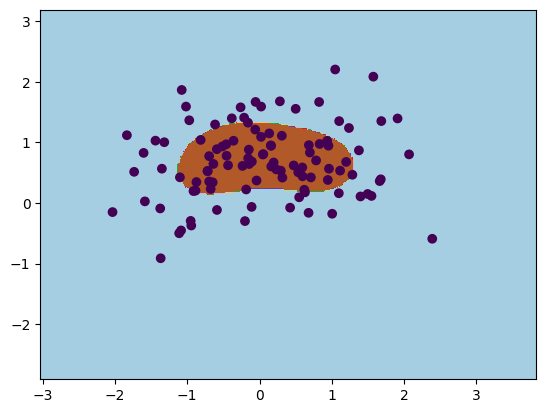

In [58]:
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

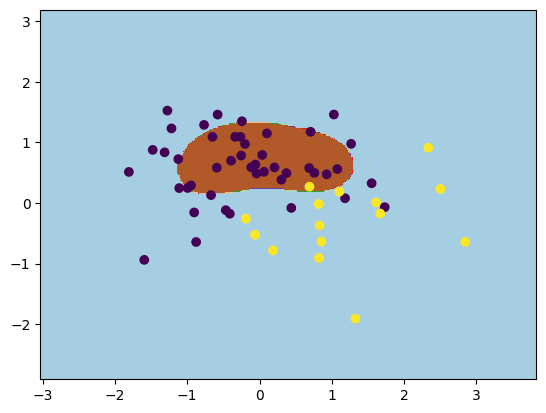

In [60]:
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

## 4. PCA
### 4.1 학습 & 예측

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [62]:
pca.fit(train_data)

PCA(n_components=1)

In [63]:
test_latent = pca.transform(test_data)

In [65]:
test_latent[:10]

array([[ 2.96603448e-01],
       [ 1.24231267e+00],
       [ 1.06281107e+00],
       [-7.40403889e-01],
       [-1.04768362e+00],
       [ 1.06747491e-01],
       [ 2.14169771e-01],
       [-2.90818242e-01],
       [-6.48459113e-01],
       [-2.02332106e-04]])

In [66]:
test_recon = pca.inverse_transform(test_latent)

In [69]:
# 값 차원 재건
test_recon[:10]

array([[ 0.34662995,  0.7059456 ],
       [ 1.28565106,  0.81821885],
       [ 1.1074189 ,  0.79690868],
       [-0.68304361,  0.58283356],
       [-0.98815024,  0.54635375],
       [ 0.15811666,  0.68340617],
       [ 0.26477925,  0.69615919],
       [-0.23663746,  0.63620773],
       [-0.59174908,  0.59374911],
       [ 0.0519232 ,  0.67070924]])

In [70]:
recon_diff = (test_data - test_recon) ** 2

In [74]:
test_data[0]

array([0.37198025, 0.49392302])

In [75]:
test_recon[0]

array([0.34662995, 0.7059456 ])

In [71]:
recon_diff[0]

array([0.00064264, 0.04495357])

In [76]:
# test_recon과 test_data의 차이인 recon_diff의 평균값
pca_pred = recon_diff.mean(1)

In [77]:
pca_pred[:10]

array([2.27981061e-02, 1.27982521e-02, 2.23592395e-01, 2.53514995e-01,
       2.49587527e-01, 1.10212458e-01, 4.89886192e-02, 1.10896685e-02,
       5.78102995e-05, 7.73374114e-03])

### 4.2 평가

In [79]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_label, pca_pred)
pca_auroc = auc(fpr, tpr)

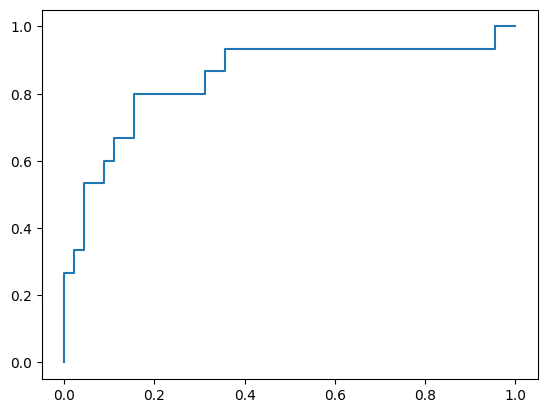

In [80]:
plt.plot(fpr, tpr)

In [81]:
print(f"PCA test AUROC is {pca_auroc:.4f}")

PCA test AUROC is 0.8474


Best Threshold

In [82]:
f1_scores = []
for t in threshold:
  pca_test_pred = pca_pred > t
  pca_test_f1 = f1_score(test_label, pca_test_pred)
  f1_scores += [pca_test_f1]
  print(f"threshold: {t:.4f}, f1-score: {pca_test_f1:.4f}")

threshold: 4.6785, f1-score: 0.0000
threshold: 3.6785, f1-score: 0.0000
threshold: 1.0618, f1-score: 0.3333
threshold: 0.9820, f1-score: 0.4211
threshold: 0.9709, f1-score: 0.4000
threshold: 0.7125, f1-score: 0.4762
threshold: 0.5299, f1-score: 0.5833
threshold: 0.4357, f1-score: 0.6154
threshold: 0.3999, f1-score: 0.5926
threshold: 0.3689, f1-score: 0.6429
threshold: 0.3551, f1-score: 0.6207
threshold: 0.3090, f1-score: 0.6452
threshold: 0.2644, f1-score: 0.6667
threshold: 0.2236, f1-score: 0.6000
threshold: 0.1824, f1-score: 0.5854
threshold: 0.1264, f1-score: 0.6047
threshold: 0.1123, f1-score: 0.5909
threshold: 0.0018, f1-score: 0.3944
threshold: 0.0004, f1-score: 0.3889
threshold: 0.0001, f1-score: 0.4054


In [83]:
best_thresh = threshold[np.argmax(f1_scores)]
best_thresh

0.2643909800681436

In [84]:
pca_test_pred = pca_pred > best_thresh

In [85]:
pca_test_pred

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True])

정확도

In [86]:
pca_test_acc = accuracy_score(test_label, pca_test_pred)

In [87]:
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

PCA Test F1-Score is 0.4054


### 4.3 시각화

In [88]:
Z = np.c_[xx.ravel(), yy.ravel()]
Z_latent = pca.transform(Z)
Z_recon = pca.inverse_transform(Z_latent)
pca_Z = (Z - Z_recon).mean(1)

In [89]:
pca_Z = list(map(int, pca_Z > best_thresh))

In [92]:
pca_Z = np.array(pca_Z).reshape(xx.shape)

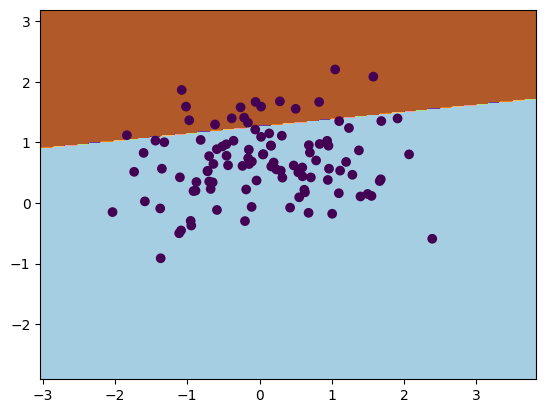

In [93]:
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

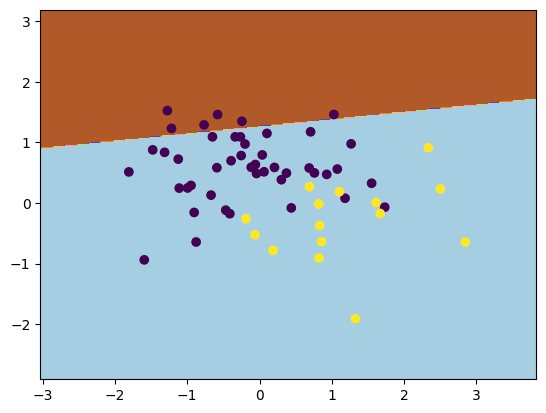

In [94]:
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

## 5. 마무리

### 5.1 정확도

In [95]:
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")

Isolation Forest Test Accuracy is 0.8667
OCSVM Test Accuracy is 0.6000
PCA Test Accuracy is 0.8167


### 5.2 F1-Score

In [96]:
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

Isolation Forest Test F1-Score is 0.7647
OCSVM Test F1-Score is 0.5385
PCA Test F1-Score is 0.4054
